In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
df = pd.read_csv('Datasets/df_customer_all.csv')

In [3]:
df

,MAGIC_KEY,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,LAST_PURCHASE_DATE,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,2_2019_FIRST_15
0,249670911D8,2,24.10,2019-02-02,27 days,93 days 00:00:00,0,1,0,0,1
1,249751FC4DD,1,17.98,2018-10-12,140 days,0 days 00:00:00,1,0,0,0,0
2,24978027606,1,15.96,2018-10-19,133 days,0 days 00:00:00,0,0,0,0,0
3,24979164422,1,13.96,2018-11-30,91 days,0 days 00:00:00,0,0,0,0,0
4,2497B8B4FDA,2,33.94,2018-11-01,120 days,29 days 00:00:00,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1274082,2E6F72C6F1C,3,51.94,2019-02-27,2 days,64 days 12:00:00,0,0,0,0,1
1274083,2E6F8194908,1,11.96,2019-02-23,6 days,0 days 00:00:00,0,0,0,0,0
1274084,2E6F9C7B9B4,1,19.98,2019-01-28,32 days,0 days 00:00:00,0,0,0,0,0
1274085,2E6FB0EBB32,6,107.88,2019-02-11,18 days,26 days 14:24:00,1,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274087 entries, 0 to 1274086
Data columns (total 11 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   MAGIC_KEY                1274087 non-null  object 
 1   PURCHASE_COUNT           1274087 non-null  int64  
 2   TOTAL_AMOUNT_SPENT       1274087 non-null  float64
 3   LAST_PURCHASE_DATE       1274087 non-null  object 
 4   DAY_SINCE_LAST_PURCHASE  1274087 non-null  object 
 5   AVERAGE_DIFF             1274087 non-null  object 
 6   10_2018_FIRST_15         1274087 non-null  int64  
 7   11_2018_FIRST_15         1274087 non-null  int64  
 8   12_2018_FIRST_15         1274087 non-null  int64  
 9   1_2019_FIRST_15          1274087 non-null  int64  
 10  2_2019_FIRST_15          1274087 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 106.9+ MB


In [5]:
df['LAST_PURCHASE_DATE'] = pd.to_datetime(df['LAST_PURCHASE_DATE'])
df['DAY_SINCE_LAST_PURCHASE'] = pd.to_timedelta(df['DAY_SINCE_LAST_PURCHASE'])
df['AVERAGE_DIFF'] = pd.to_timedelta(df['AVERAGE_DIFF'])

In [6]:
df['DAY_SINCE_LAST_PURCHASE'] = df['DAY_SINCE_LAST_PURCHASE'].dt.days.astype(int)
df['AVERAGE_DIFF'] = df['AVERAGE_DIFF'].dt.days.astype(int)

In [7]:
df.drop(columns=['LAST_PURCHASE_DATE'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274087 entries, 0 to 1274086
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   MAGIC_KEY                1274087 non-null  object 
 1   PURCHASE_COUNT           1274087 non-null  int64  
 2   TOTAL_AMOUNT_SPENT       1274087 non-null  float64
 3   DAY_SINCE_LAST_PURCHASE  1274087 non-null  int32  
 4   AVERAGE_DIFF             1274087 non-null  int32  
 5   10_2018_FIRST_15         1274087 non-null  int64  
 6   11_2018_FIRST_15         1274087 non-null  int64  
 7   12_2018_FIRST_15         1274087 non-null  int64  
 8   1_2019_FIRST_15          1274087 non-null  int64  
 9   2_2019_FIRST_15          1274087 non-null  int64  
dtypes: float64(1), int32(2), int64(6), object(1)
memory usage: 87.5+ MB


In [9]:
df

,MAGIC_KEY,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,2_2019_FIRST_15
0,249670911D8,2,24.10,27,93,0,1,0,0,1
1,249751FC4DD,1,17.98,140,0,1,0,0,0,0
2,24978027606,1,15.96,133,0,0,0,0,0,0
3,24979164422,1,13.96,91,0,0,0,0,0,0
4,2497B8B4FDA,2,33.94,120,29,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1274082,2E6F72C6F1C,3,51.94,2,64,0,0,0,0,1
1274083,2E6F8194908,1,11.96,6,0,0,0,0,0,0
1274084,2E6F9C7B9B4,1,19.98,32,0,0,0,0,0,0
1274085,2E6FB0EBB32,6,107.88,18,26,1,0,0,0,1


In [10]:
le = LabelEncoder() #creating an instance of LabelEncoder
df['MAGIC_KEY_ENCODED'] = le.fit_transform(df['MAGIC_KEY'])
df_encoded = df.drop(columns = ['MAGIC_KEY'])
df_encoded

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,2_2019_FIRST_15,MAGIC_KEY_ENCODED
0,2,24.10,27,93,0,1,0,0,1,0
1,1,17.98,140,0,1,0,0,0,0,1
2,1,15.96,133,0,0,0,0,0,0,2
3,1,13.96,91,0,0,0,0,0,0,3
4,2,33.94,120,29,1,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...
1274082,3,51.94,2,64,0,0,0,0,1,1274082
1274083,1,11.96,6,0,0,0,0,0,0,1274083
1274084,1,19.98,32,0,0,0,0,0,0,1274084
1274085,6,107.88,18,26,1,0,0,0,1,1274085


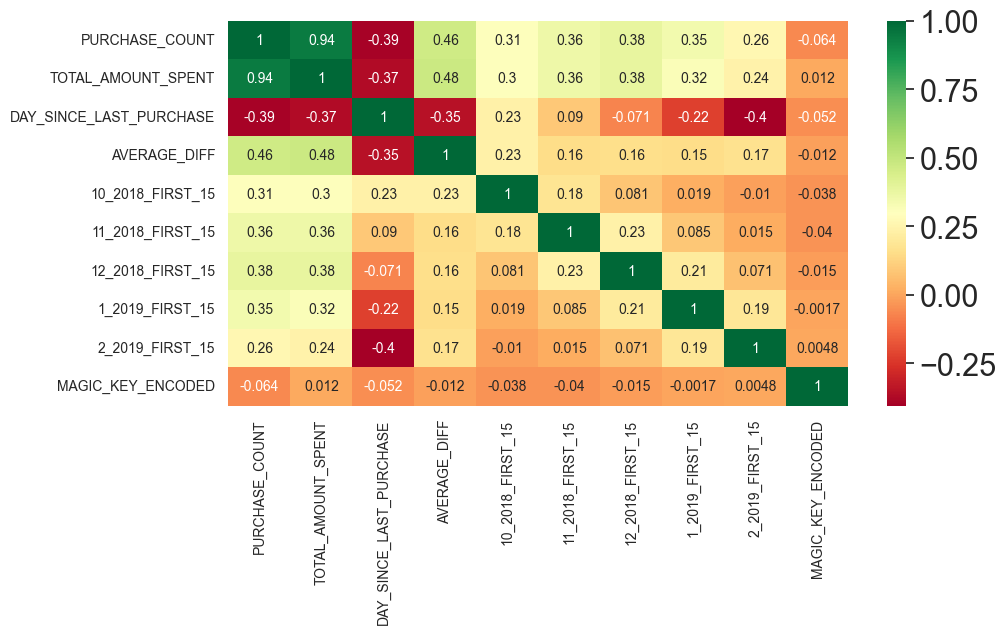

In [11]:
sns.set(font_scale = 2)
plt.subplots(figsize = (10, 5))
heat_plot = sns.heatmap(df_encoded.corr(method = 'pearson'), annot = True, cmap = 'RdYlGn', annot_kws={'size': 10})

plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)

plt.show()

In [12]:
correlation = df_encoded.corr(method = 'pearson') #finding all correlation between each features
print(correlation['2_2019_FIRST_15'].sort_values(ascending = False).to_string()) #printing correlation with class in descending order

2_2019_FIRST_15            1.000000
PURCHASE_COUNT             0.262830
TOTAL_AMOUNT_SPENT         0.240472
1_2019_FIRST_15            0.193376
AVERAGE_DIFF               0.166505
12_2018_FIRST_15           0.070544
11_2018_FIRST_15           0.014684
MAGIC_KEY_ENCODED          0.004835
10_2018_FIRST_15          -0.010157
DAY_SINCE_LAST_PURCHASE   -0.404172


=> DAY_SINCE_LAST_PURCHASE  has higher corelation and purchase count, as well as total amount spent

In [13]:
from sklearn.utils import shuffle #importing the suffle module
shuffled_df = shuffle(df_encoded)
shuffled_df #checking

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,2_2019_FIRST_15,MAGIC_KEY_ENCODED
1191887,1,13.96,138,0,1,0,0,0,0,1191887
1083330,1,15.98,23,0,0,0,0,0,1,1083330
563607,1,15.96,84,0,0,0,1,0,0,563607
1175449,2,23.92,4,32,0,0,0,0,0,1175449
1107788,1,23.98,29,0,0,0,0,0,0,1107788
...,...,...,...,...,...,...,...,...,...,...
870449,6,119.88,7,28,1,0,0,0,0,870449
1089063,1,23.98,125,0,0,0,0,0,0,1089063
969015,1,15.98,143,0,1,0,0,0,0,969015
461371,1,19.98,114,0,0,1,0,0,0,461371


In [14]:
#rearranging the index value
rearranged_df = shuffled_df.reset_index(drop = True)
rearranged_df

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,2_2019_FIRST_15,MAGIC_KEY_ENCODED
0,1,13.96,138,0,1,0,0,0,0,1191887
1,1,15.98,23,0,0,0,0,0,1,1083330
2,1,15.96,84,0,0,0,1,0,0,563607
3,2,23.92,4,32,0,0,0,0,0,1175449
4,1,23.98,29,0,0,0,0,0,0,1107788
...,...,...,...,...,...,...,...,...,...,...
1274082,6,119.88,7,28,1,0,0,0,0,870449
1274083,1,23.98,125,0,0,0,0,0,0,1089063
1274084,1,15.98,143,0,1,0,0,0,0,969015
1274085,1,19.98,114,0,0,1,0,0,0,461371


In [15]:
X = rearranged_df.drop(columns = ['2_2019_FIRST_15']) #dropping the class collumn to separate the feature
X

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,MAGIC_KEY_ENCODED
0,1,13.96,138,0,1,0,0,0,1191887
1,1,15.98,23,0,0,0,0,0,1083330
2,1,15.96,84,0,0,0,1,0,563607
3,2,23.92,4,32,0,0,0,0,1175449
4,1,23.98,29,0,0,0,0,0,1107788
...,...,...,...,...,...,...,...,...,...
1274082,6,119.88,7,28,1,0,0,0,870449
1274083,1,23.98,125,0,0,0,0,0,1089063
1274084,1,15.98,143,0,1,0,0,0,969015
1274085,1,19.98,114,0,0,1,0,0,461371


In [16]:
y =  rearranged_df['2_2019_FIRST_15'] #separating target to y
y

0          0
1          1
2          0
3          0
4          0
          ..
1274082    0
1274083    0
1274084    0
1274085    0
1274086    0
Name: 2_2019_FIRST_15, Length: 1274087, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split #importing module

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) #80-20% split

In [19]:
print(len(X_train)) #checking
print(len(X_test))

1019269
254818


In [20]:
print(len(y_train)) #checking
print(len(y_test))

1019269
254818


In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
tree_clf = DecisionTreeClassifier(max_depth = 5, random_state = 42)
tree_clf.fit(X, y)
tree_clf.feature_importances_

array([0.01056254, 0.        , 0.96634802, 0.02308944, 0.        ,
       0.        , 0.        , 0.        , 0.        ])

=> DAY_SINCE_LAST_PURCHASE is most important in this datasets

In [23]:
#creating instance of decision tree, depth 2
tree_clf = DecisionTreeClassifier(max_depth = 5, random_state = 42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [24]:
y_pred = tree_clf.predict(X_test)

In [25]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9856485805555337

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=25, criterion="entropy", random_state = 42, max_depth=26, n_jobs=-1)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=26, n_estimators=25,
                       n_jobs=-1, random_state=42)

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
metrics.accuracy_score(y_test, y_pred)

0.9889646728253106

In [29]:
df_problem = pd.read_csv('Datasets/problem 1.csv')

In [30]:
df_problem

,MAGIC_KEY
0,28D5BB06356
1,293BEAB4E98
2,2962EE8065C
3,2957BE29EA9
4,28E351A0745
...,...
58684,28FB7C09776
58685,28E0E3B69BF
58686,28D343103A7
58687,290B1D6D5CB


In [31]:
df_test = pd.merge(df, df_problem, on = 'MAGIC_KEY')
df_test

,MAGIC_KEY,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,2_2019_FIRST_15,MAGIC_KEY_ENCODED
0,2498CA210F2,2,27.92,24,61,0,0,1,0,1,8
1,249BD4201E6,2,31.92,16,30,0,0,0,1,1,12
2,249C911B64A,7,109.72,10,22,1,1,1,1,0,15
3,249D123A385,3,49.92,9,57,0,0,0,0,0,17
4,249DA1DC108,2,31.92,27,31,0,0,0,1,1,19
...,...,...,...,...,...,...,...,...,...,...,...
58684,297D14BF319,5,91.90,16,30,0,1,0,1,1,299662
58685,297D17F1EED,5,91.90,25,28,1,1,1,1,1,299685
58686,297D18E7B24,5,97.90,13,29,0,0,0,0,0,299691
58687,297D1A68BFD,5,84.90,19,32,1,1,0,1,1,299704


In [32]:
df_test_X = df_test.drop(columns = ['MAGIC_KEY'])
df_test_X = df_test_X.drop(columns = ['2_2019_FIRST_15'])

In [33]:
df_test_X

,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,MAGIC_KEY_ENCODED
0,2,27.92,24,61,0,0,1,0,8
1,2,31.92,16,30,0,0,0,1,12
2,7,109.72,10,22,1,1,1,1,15
3,3,49.92,9,57,0,0,0,0,17
4,2,31.92,27,31,0,0,0,1,19
...,...,...,...,...,...,...,...,...,...
58684,5,91.90,16,30,0,1,0,1,299662
58685,5,91.90,25,28,1,1,1,1,299685
58686,5,97.90,13,29,0,0,0,0,299691
58687,5,84.90,19,32,1,1,0,1,299704


In [34]:
y_pred = classifier.predict(df_test_X)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [35]:
predictions_mapped = ['Y' if pred == 1 else 'N' for pred in y_pred]
predictions_mapped

['Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'Y'

In [36]:
# Add the predicted values as a new column to X_test
df_test['PURCHASE'] = predictions_mapped

# Now X_test contains the predicted values in the 'y_pred' column
df_test

,MAGIC_KEY,PURCHASE_COUNT,TOTAL_AMOUNT_SPENT,DAY_SINCE_LAST_PURCHASE,AVERAGE_DIFF,10_2018_FIRST_15,11_2018_FIRST_15,12_2018_FIRST_15,1_2019_FIRST_15,2_2019_FIRST_15,MAGIC_KEY_ENCODED,PURCHASE
0,2498CA210F2,2,27.92,24,61,0,0,1,0,1,8,Y
1,249BD4201E6,2,31.92,16,30,0,0,0,1,1,12,Y
2,249C911B64A,7,109.72,10,22,1,1,1,1,0,15,N
3,249D123A385,3,49.92,9,57,0,0,0,0,0,17,N
4,249DA1DC108,2,31.92,27,31,0,0,0,1,1,19,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
58684,297D14BF319,5,91.90,16,30,0,1,0,1,1,299662,Y
58685,297D17F1EED,5,91.90,25,28,1,1,1,1,1,299685,Y
58686,297D18E7B24,5,97.90,13,29,0,0,0,0,0,299691,N
58687,297D1A68BFD,5,84.90,19,32,1,1,0,1,1,299704,Y


In [37]:
solutions = df_test[['MAGIC_KEY', 'PURCHASE']].copy()
solutions

,MAGIC_KEY,PURCHASE
0,2498CA210F2,Y
1,249BD4201E6,Y
2,249C911B64A,N
3,249D123A385,N
4,249DA1DC108,Y
...,...,...
58684,297D14BF319,Y
58685,297D17F1EED,Y
58686,297D18E7B24,N
58687,297D1A68BFD,Y


In [38]:
solutions.to_csv("Submission.csv", index=False)  # Save test data